<a href="https://colab.research.google.com/github/aarpitdubey/pancarddetector/blob/main/PAN_Card_Tampering_Detector_App_Deployed_on_Heroku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective :** The purpose of this project is to detect tempering/fraud of PAN card uning the computer vision.

**Problem** : PAN card is required as a proof of identity for the citizen of india so, to prevent the crime or fraud something required to differentiate it.


**Solution** : Computer vision is a field of artificial intelligence that trains computers to interpret and understand the visual world. Using digital images from cameras and videos and deep learning models, machines can accurately identify and classify objects — and then react to what they “Visualize”

This project will help the different organizations in detecting whether the Id i.e. the PAN card provided to them by their employees or customers or anyone is original or not.

For this project we will calculate the structural similarity of the original PAN card and the PAN card uploaded by the user.
 
Please check out this blog : 


 https://www.analyticsvidhya.com/blog/2021/06/pan-card-fraud-detection-using-computer-vision/

 (Credit: Analytics Vidhya)

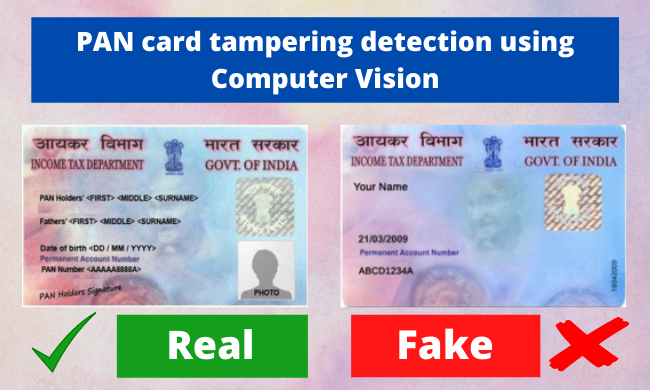

**Steps :**

1. Import necessary libraries
2. Scraping the tampered and original pan card from the website
3. Scaling down the shape of the tampered image as the original image
4. Read original and tampered image
5. Converting an image into a grayscale image
6. Applying Structural Similarity Index (SSIM) technique between the two images
7. Calculate Threshold and contours and
8. Experience real-time contours and threshold on images




In [1]:
# Let's started the coding part
# Step 1: Importing the necessary Libraries/packages

from skimage.metrics import structural_similarity # for finding the similarity
import imutils
import cv2
from PIL import Image
import requests

1. **Skimage:** Scikit-image, or ski-mage, is an open-source Python package, in this project most of the image processing techniques will be used via scikit-image

2. **imutils:** Imutils are a series of convenience functions to make basic image processing functions such as translation, rotation, resizing, and displaying images easier with OpenCV.

3. **cv2:** OpenCV (Open Source Computer Vision Library) is a library of programming functions. Here in this project major reading and writing of the image are done via cv2.

4. **PIL:** PIL (Python Imaging Library) is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.

Make folders and sub-folders for storing images, you may create it manually As, I'm creating it on google colab notebook so, It will create folder in default directory you can also manually set the path.

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

**Scraping original and tampered PAN card from different sources**

In [3]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In the above code snippet, we are web scarping the images from different sources using the requests library.

## **Loading original and user-provided images**

In [4]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Checking the difference b/w file format of original and tempered PANCARDS
print('-' * 80)

# Image size, are in pixels. 
# The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size)

# Check the difference in terms of size or dimentions



Original image format :  JPEG
Tampered image format :  PNG
--------------------------------------------------------------------------------
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


**Observation**: As you can see in the above output, The original size of the original image and the original size of tampered image are different which will result in unwanted/false results while doing image processing, that’s why scaling down both the image to equal shape is prominently needed.

## **Converting the format of a tampered image similar to the original image.**

In [5]:
# Resizing the Original Image size.
original = original.resize((250, 160))
print(original.size)

# Saving that re-sized original image
original.save(r'pan_card_tampering/image/original.png')

print('-'*80)

# Resizing the tampered Image size.
tampered = tampered.resize((250,160))
print(tampered.size)

# Saving that re-sized tampered image
tampered.save(r'pan_card_tampering/image/tampered.png')

(250, 160)
--------------------------------------------------------------------------------
(250, 160)


Now, if you will see the output the shape of both the images (Original image and tampered image) is scaled down to equal shape i.e., **(250, 160)**. now the image processing will be smoother and more accurate than it before.

Here, we checked the format and size of the original and tampered image.


In [6]:
from os import pathconf_names
tampered = Image.open(r'pan_card_tampering/image/tampered.png')
tampered.save(r'pan_card_tampering/image/tampered.png')

## Converting the sizeof tampered and original image.

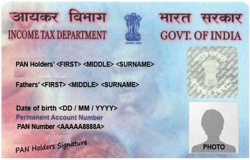

In [7]:
original

## Original PAN card image used for comparision.

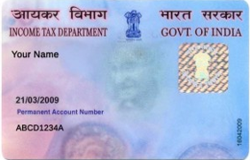

In [8]:
tampered

## User provided image which will be compared with PAN card.

In [9]:
#load the two imput images
original = cv2.imread(r'pan_card_tampering/image/original.png')
tampered = cv2.imread(r'pan_card_tampering/image/tampered.png')

## Reading images using OpenCv

In [10]:
#Convert the images into grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In the above code we have converted the original images (Original pan card and user given Pan card) to gray-scale images using cv2's function **cvtColor() **which have parameter as **cv2.COLOR_BGR2GRAY**.

But **why** we need to convert them into grayscale ? Here's the reason why :

* Converting images into grayscale is very much beneficial inaccuracy of image processing because in image processing many applications don’t help us in identifying the importance, edges of the colored images also colored images are a bit complex to understand by machine because they have **3 channel **while grayscale has only **1 channel**.

What is SSIM ?


> The Structural Similarity Index (SSIM) is a perceptual metric that quantifies the image quality degradation that is caused by processing such as data compression or by losses in data transmission.



How SSIM perform its function ?

> This metric is basically a full reference that requires 2 images from the same shot, this means 2 graphically identical images to the human eye. The second image generally is compressed or has a different quality, which is the goal of this index.

What is the real world use of SSIM ?

> SSIM is usually used in the video industry, but has as well a strong application in photography.

How SSIM helps in detection ?

> SSIM actually measures the perceptual difference between two similar images. It cannot judge which of the two is better: that must be inferred from knowing which is the original one and which has been exposed to additional processing such as compression or filters.

In [11]:
# Compute the Structural Similarity Index (SSIM) between the two images, 
# ensuring that the difference image is returned

(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print(f"SSIM Score is : {score * 100}")

# if score >= 80:
#   print("The given PAN CARD is Original")
# else:
#   print("The given PAN CARD is tampered")

SSIM Score is : 31.678790332739425


Let's breakdown what just happened in above code !

* Structural similarity index helps us to determine exactly where in **terms of x,y coordinates location, the image differences** are. Here, we are trying to find similarities between the original and tampered image.
* The lower the SSIM score lower is the similarity, i.e SSIM score is **directly propotional to similarity** between two images
* We have given one **threshold value** of "45" i.e if any score is >= 80 it will be regarded as original pan card else tampered one.
* Generally SSIM values 0.97, 0.98, 0.99 for good quallty recontruction techniques.

In [12]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts  = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts  = imutils.grab_contours(cnts)

## Creating bounding boxes (contoours)

In [13]:
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


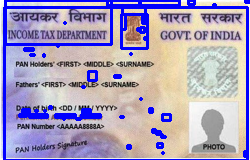

In [14]:
 #Display original image with contou
print('Original Format Image')
original_contour = Image.fromarray(original)
original_contour.save(r"pan_card_tampering/image/original_contour_image.png")
original_contour

**Inference :**

* Here is the above output,you can see that the original image is shown with the contours (bounding boxes) on it using **fromarray()** function.

* Also you can save the image using save() function.

## Need for edge detection

**Edge detection** is an image processing technique for finding the boundaries of objects within images. It works by **detecting** discontinuities in brightness. Edge detection is used for **image segmentation and data extraction** in areas such as image processing, computer vision, and machine vision.

Tampered Image


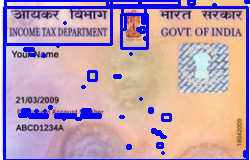

In [15]:
# Display tampered image with contour
print('Tampered Image')
tampered_contour = Image.fromarray(tampered)
tampered_contour.save(f"pan_card_tampering/image/tampered_contours_image.png")
tampered_contour

**Inference :**

look, Similar to the Original image.

Similarity goes with tampered image but one can notice that some of the contours are missing in tampered images,

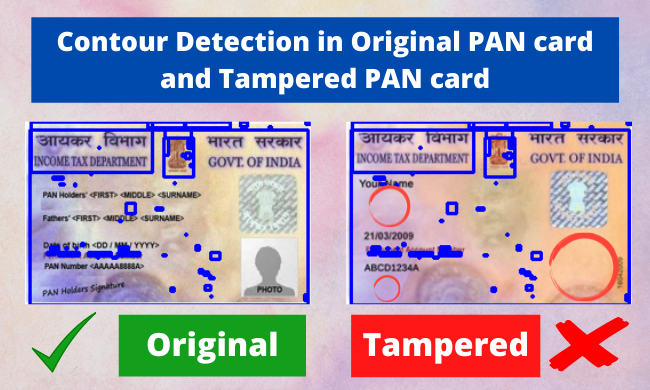

Different Image


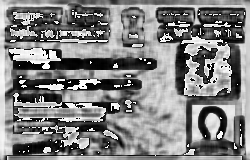

In [16]:
# Display difference image with black

print('Different Image')
difference_image = Image.fromarray(diff)
difference_image.save("pan_card_tampering/image/difference_image.png")
difference_image

**Inference :**

* Here is another very interactive way to show the contours in terms of heated threshold i.e. by finding the heated zone (text/image zone) and normal zone (without text/image).

* The heated zone i.e the zone which has text/images will be shown in dark (black) region, and the other one as light (kind of white) zone.

Threshold Image


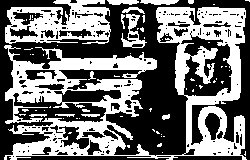

In [17]:
#Display threshold image with white

print('Threshold Image')
threshold_image = Image.fromarray(thresh)
threshold_image.save("pan_card_tampering/image/threshold_image.png")
threshold_image

**Inference:** 

* Everything here is just the same all we can see is the change in the role of color, here white color is showing the heated zone and the black color is showing the normal zone.

**Summary :** 

* Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images.
* Similarly, finding out the threshold and contours based on that threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
* As our SSIM is ~31.2% we can say that the image user provided is **fake or tampered** with.
* Finally, we **visualized the differences and similarities between the images** using by displaying the images with contours, difference, and threshold.

**Scope :**

This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out **whether the ID is original or fake.** Similarly, this can be used for any type of **ID like Aadhar, voter id, etc.**